## MSDS 460 - Week 4 Discussion Post - Supporting Python Code

#### Steve Desilets

#### Problem

The Bavarian Motor Company (BMC) manufactures expensive luxury cars in Hamburg, Germany, and exports cars to sell in the United States. The exported cars are shipped from Hamburg to ports in Newark, New Jersey and Jacksonville, Florida. From these ports, the cars are transported by rail or truck to distributors located in Boston, Massachusetts; Columbus, Ohio; Atlanta, Georgia; Richmond, Virginia; and Mobile, Alabama. The below figure shows the possible shipping routes available to the company along with the transportation cost for shipping each car along the indicated path. Currently, 200 cars are available at the port in Newark and 300 are available in Jacksonville. The numbers of cars needed by the distributors in Boston, Columbus, Atlanta, Richmond, and Mobile are 100, 60, 170, 80, and 70, respectively. BMC wants to determine the least costly way of transporting cars from the ports in Newark and Jacksonville to the cities where they are needed.  Formulate the LP and solve it using software of your choice. Conduct sensitivity analysis and interpret.  Provide the duals and demonstrate strong duality.

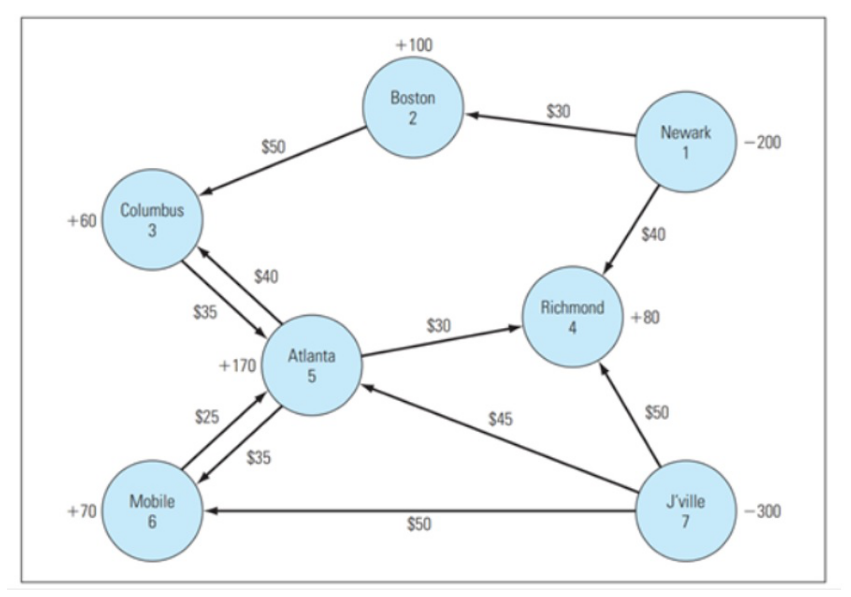

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
question = plt.imread('Discussion_4_Problem_Network.jpg')
plt.imshow(question)
plt.axis("off")
plt.show()

#### Solution

Having defined the primary problem, we can leverage the Simplex Method in Python to solve the primary cost minimization problem.

In [28]:
# Let's solve this problem using the simplex method

# Import necessary methods and functions
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize, GLPK
import pandas as pd
#from scikit-glpk import GLPK

# Create linear programming variables
Newark_Boston = LpVariable("Newark_Boston", 0, None) # Newark_Boston >= 0 & no upper bound
Newark_Columbus = LpVariable("Newark_Columbus", 0, None) # Newark_Columbus >= 0 & no upper bound
Newark_Atlanta = LpVariable("Newark_Atlanta", 0, None) # Newark_Atlanta >= 0 & no upper bound 
Newark_Mobile = LpVariable("Newark_Mobile", 0, None) # Newark_Mobile >= 0 & no upper bound
Newark_Richmond = LpVariable("Newark_Richmond", 0, None) # Newark_Richmond >= 0 & no upper bound
Newark_Excess = LpVariable("Newark_Excess", 0, None) # Newark_Excess >= 0 & no upper bound
Jacksonville_Columbus = LpVariable("Jacksonville_Columbus", 0, None) # Jacksonville_Columbus >= 0 & no upper bound
Jacksonville_Atlanta = LpVariable("Jacksonville_Atlanta", 0, None) # Jacksonville_Atlanta >= 0 & no upper bound 
Jacksonville_Mobile = LpVariable("Jacksonville_Mobile", 0, None) # Jacksonville_Mobile >= 0 & no upper bound
Jacksonville_Richmond = LpVariable("Jacksonville_Richmond", 0, None) # Jacksonville_Richmond >= 0 & no upper bound
Jacksonville_Excess = LpVariable("Jacksonville_Excess", 0, None) # Jacksonville_Excess >= 0 & no upper bound

# Create the problem variable
primary_prob = LpProblem("problem", LpMinimize)

# Define the constraints - remember that the lower bounds are defined in LpVariable above
primary_prob += Newark_Boston >= 100
primary_prob += Newark_Columbus + Jacksonville_Columbus >= 60
primary_prob += Newark_Atlanta + Jacksonville_Atlanta >= 170
primary_prob += Newark_Mobile + Jacksonville_Mobile >= 70
primary_prob += Newark_Richmond + Jacksonville_Richmond >= 80
primary_prob += Newark_Boston + Newark_Columbus + Newark_Atlanta + Newark_Mobile + Newark_Richmond + Newark_Excess >= 200
primary_prob += Jacksonville_Columbus + Jacksonville_Atlanta + Jacksonville_Mobile + Jacksonville_Richmond + Jacksonville_Excess >= 300
primary_prob += -Newark_Boston - Newark_Columbus - Newark_Atlanta - Newark_Mobile - Newark_Richmond - Newark_Excess >= -200
primary_prob += -Jacksonville_Columbus - Jacksonville_Atlanta - Jacksonville_Mobile - Jacksonville_Richmond - Jacksonville_Excess >= -300

# Define the objective function to minimize
primary_prob += (30*Newark_Boston) + (80*Newark_Columbus) + (115*Newark_Atlanta) + (150*Newark_Mobile) + (40*Newark_Richmond) + (85*Jacksonville_Columbus) + (45*Jacksonville_Atlanta) + (50*Jacksonville_Mobile) + (50*Jacksonville_Richmond)

# Solve the problem
status = primary_prob.solve()
LpStatus[status]
#primary_prob.writeLP("primary_prob.lp")
#primary_prob.solve(GLPK(options=['--ranges primary_prob.sen']))
#print ("Status:", LpStatus[primary_prob.status])

# Print the solution
print ("Optimal Solution:")
for variable in primary_prob.variables():
    print(variable.name, " = ", value(variable), " cars shipped on this route")

print("Total Cost = $", round(value(primary_prob.objective),2))

print("")
print("Sensitivity Report:")

sensitivity = [{'Name':name,'Constraint':c,'shadow price':c.pi,'slack': c.slack} for name, c in primary_prob.constraints.items()]

print(pd.DataFrame(sensitivity))

Optimal Solution:
Jacksonville_Atlanta  =  170.0  cars shipped on this route
Jacksonville_Columbus  =  40.0  cars shipped on this route
Jacksonville_Excess  =  20.0  cars shipped on this route
Jacksonville_Mobile  =  70.0  cars shipped on this route
Jacksonville_Richmond  =  0.0  cars shipped on this route
Newark_Atlanta  =  0.0  cars shipped on this route
Newark_Boston  =  100.0  cars shipped on this route
Newark_Columbus  =  20.0  cars shipped on this route
Newark_Excess  =  0.0  cars shipped on this route
Newark_Mobile  =  0.0  cars shipped on this route
Newark_Richmond  =  80.0  cars shipped on this route
Total Cost = $ 22350.0

Sensitivity Report:
  Name                                         Constraint  shadow price  slack
0  _C1                                 {Newark_Boston: 1}          35.0   -0.0
1  _C2     {Newark_Columbus: 1, Jacksonville_Columbus: 1}          85.0   -0.0
2  _C3       {Newark_Atlanta: 1, Jacksonville_Atlanta: 1}          45.0   -0.0
3  _C4         {Newark_

Having solved the primary problem, we can now solve the dual problem that we have also defined.

In [7]:
# Let's solve this problem using the simplex method

# Import necessary methods and functions
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# Create linear programming variables
Y_One = LpVariable("Y_One", 0, None) # Y_One >= 0 & no upper bound
Y_Two = LpVariable("Y_Two", 0, None) # Y_Two >= 0 & no upper bound
Y_Three = LpVariable("Y_Three", 0, None) # Y_Three >= 0 & no upper bound 
Y_Four = LpVariable("Y_Four", 0, None) # Y_Four >= 0 & no upper bound
Y_Five = LpVariable("Y_Five", 0, None) # Y_Five >= 0 & no upper bound
Y_Six = LpVariable("Y_Six", 0, None) # Y_Six >= 0 & no upper bound
Y_Seven = LpVariable("Y_Seven", 0, None) # Y_Seven >= 0 & no upper bound
Y_Eight = LpVariable("Y_Eight", 0, None) # Y_Eight >= 0 & no upper bound 
Y_Nine = LpVariable("Y_Nine", 0, None) # Y_Nine >= 0 & no upper bound

# Create the problem variable
dual_prob = LpProblem("problem", LpMaximize)

# Define the constraints - remember that the lower bounds are defined in LpVariable above
dual_prob += Y_One + Y_Six - Y_Eight <= 30
dual_prob += Y_Two + Y_Six - Y_Eight <= 80
dual_prob += Y_Three + Y_Six - Y_Eight <= 115
dual_prob += Y_Four + Y_Six - Y_Eight <= 150
dual_prob += Y_Five + Y_Six - Y_Eight <= 40
dual_prob += Y_Six - Y_Eight <= 0
dual_prob += Y_Two + Y_Seven - Y_Nine <= 85
dual_prob += Y_Three + Y_Seven - Y_Nine <= 45
dual_prob += Y_Four + Y_Seven - Y_Nine <= 50
dual_prob += Y_Five + Y_Seven - Y_Nine <= 50
dual_prob += Y_Seven - Y_Nine <= 0

# Define the objective function to minimize
dual_prob += (100*Y_One) + (60*Y_Two) + (170*Y_Three) + (70*Y_Four)+ (80*Y_Five) + (200*Y_Six) + (300*Y_Seven) - (200*Y_Eight) - (300*Y_Nine)

# Solve the problem
status = dual_prob.solve()
LpStatus[status]

# Print the solution
print ("Optimal Solution:")
for variable in dual_prob.variables():
    print(variable.name, " = ", value(variable))

print("Total Cost = $", round(value(dual_prob.objective),2))

Optimal Solution:
Y_Eight  =  5.0
Y_Five  =  45.0
Y_Four  =  50.0
Y_Nine  =  0.0
Y_One  =  35.0
Y_Seven  =  1e-12
Y_Six  =  0.0
Y_Three  =  45.0
Y_Two  =  85.0
Total Cost = $ 22350.0


The fact that we obtained identical optimal solutions for both the primary and dual problems - a cost of $22,350 - proves that we have demonstrated that there exists strong duality between these optimal solutions for these related problems.